<a href="https://colab.research.google.com/github/khixson1/Project2_Dataset_Selection/blob/main/Project2_Part2_Crop_Recommendations_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crop Recommendations Machine Learning Exercise to predict best crop to grow in a given area





Kim Hixson

# First Dataset Proposed: Crop_recommendations.csv 

**Source of Data:** (https://www.kaggle.com/atharvaingle/crop-recommendation-dataset)

**Brief description of data:** Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters. This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

**What is the target?** What they refer to as 'label' is a column of various crops

**Is this a classification or regression problem?** Both

**How many features?** Eight features(columns)

**How many rows of data?** 2200 rows of data

**Anticipated challenges:** Few to none. The data appear to have no missing data and are already aligned for machine learning with 1 object column which serves as a target.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [32]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Upload data and view info

filename = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Week_7/Data_Uploads/Crop_recommendation.csv'

df_crop = pd.read_csv(filename)

display(df_crop.info())
display(df_crop.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


None

(2200, 8)

In [34]:
# Display the head of the dataset

display(df_crop.head())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Preprocessing Steps

1. deleted unnecessary columns

2. deleted duplicate rows

3. identified and addressed missing values 

4. identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

5. produced univariate visuals for the target and all features

6. identified outliers

7. produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

8. clearly commented all of your cleaning steps and described any decisions you made  (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. 


In [35]:
# Check for unnecessary columns

display(df_crop.info())
display(df_crop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


None

All columns appear to be necessary in this dataset. There is no need to drop any columns.

In [36]:
# Delete duplicated rows

# Check for duplicates
df_crop.duplicated().sum()

0

There appear to be no duplicated rows.  No row removal is needed.

In [37]:
# Identify and address missing values

# Check for missing values
df_crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no missing values

In [38]:
# Identified and correct inconsistencies in data for categorical values (i.e. Cat, cat, cats)

# Check for inconsistencies in catagorical values

display(df_crop['label'].value_counts())
display(df_crop['label'].nunique())
display(df_crop['label'].unique())

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

22

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

The only object column contains 22 classes. There seem to be no inconsistancies in the data categories

In [39]:
# Convert our target vector ('label') into numbers

crop_dict = {'rice':0, 'maize':1, 'chickpea':2, 'kidneybeans':3, 'pigeonpeas':4,
       'mothbeans':5, 'mungbean':6, 'blackgram':7, 'lentil':8, 'pomegranate':9,
       'banana':10, 'mango':11, 'grapes':12, 'watermelon':13, 'muskmelon':14, 'apple':15,
       'orange':16, 'papaya':17, 'coconut':18, 'cotton':19, 'jute':20, 'coffee':21}

df_crop['label']=df_crop['label'].replace(crop_dict)

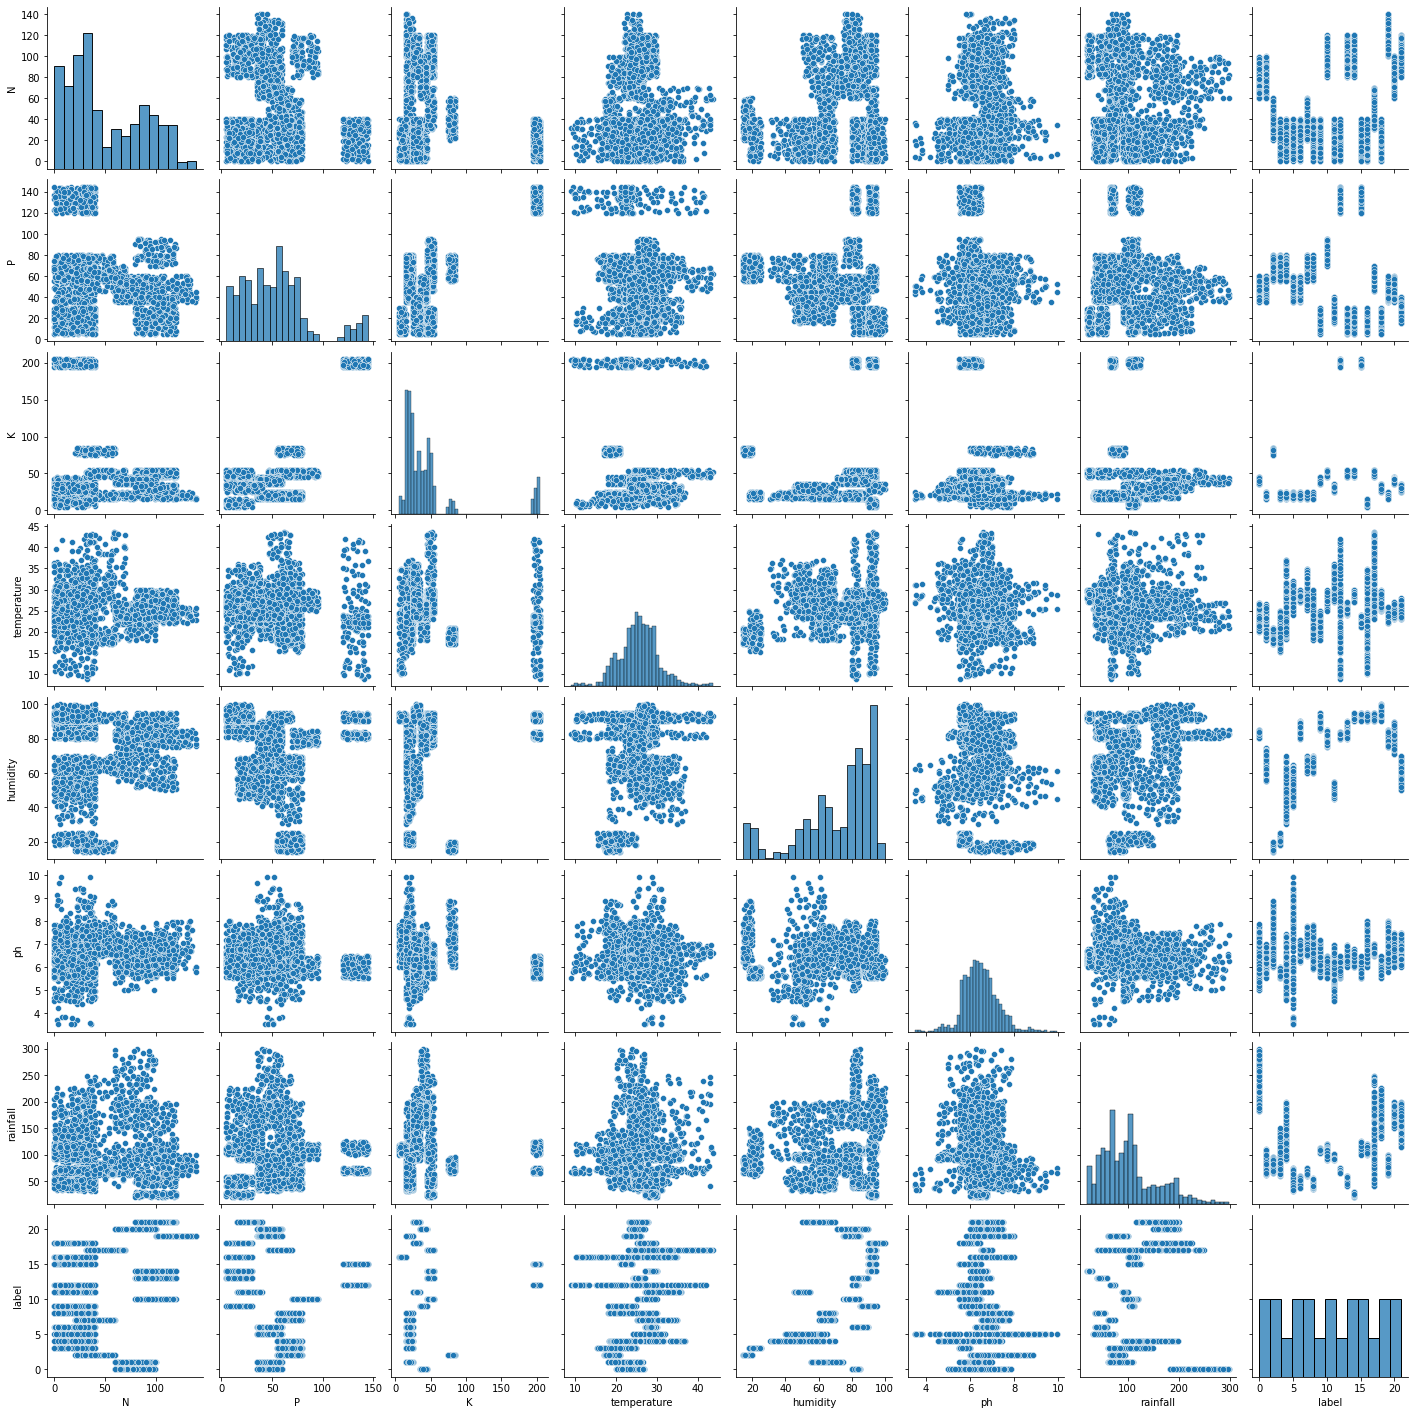

In [40]:
# Produce univariate and multivariate visuals for the target and all features

sns.pairplot(data=df_crop)

In [41]:
# Identify outliers

# Check for outliers
df_crop.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


There appear to be no outliers in these data

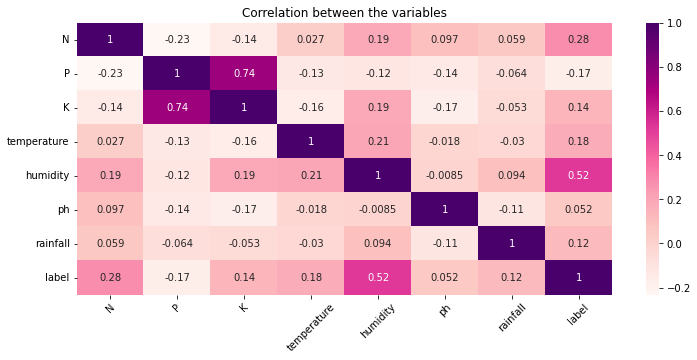

In [44]:
# Produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

# Produce pairwise correlation matrix
corr = df_crop.corr

# Plot Pairwise Correlations
plt.subplots(figsize=(12,5));
corr=df_crop.corr();
sns.heatmap(corr,annot=True,cmap='RdPu');
plt.title('Correlation between the variables');
plt.xticks(rotation=45);

Our target ('label') or crop is most highly correlated to humidity followed by nitrogen (N)


---

Potassium (K) and Phosphate (K) levels are also highly correlated

In [47]:
# Check for balance between target ('label') classes

df_crop['label'].value_counts(normalize=True)

0     0.045455
1     0.045455
20    0.045455
19    0.045455
18    0.045455
17    0.045455
16    0.045455
15    0.045455
14    0.045455
13    0.045455
12    0.045455
11    0.045455
10    0.045455
9     0.045455
8     0.045455
7     0.045455
6     0.045455
5     0.045455
4     0.045455
3     0.045455
2     0.045455
21    0.045455
Name: label, dtype: float64

The crop classes in our 'label' or target vector are perfectly balanced